In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat
from scipy import signal

#custom made functions
import utils
import functions as fn


 ### Run the model for Fig 4

In [2]:
#Get w0, w1
cm = 1.0; N = 129; sf0 = 4/N; theta = 0; phase = 0.0; std = 1/(8*sf0) 

w0 = fn.getGabor(cm,sf0,theta,N,phase,std)
A = np.sum(np.absolute(w0));w0 = w0/A

w1 = fn.getGabor(cm,sf0,theta,N,phase+np.pi/2,3*std)
Aw = np.sum(np.absolute(w1));w1 = w1/Aw

#Create w0 and w1 dictionaries with different noise levels

noiseLevels = np.array([0,1,2,3,4,5,6,7,8,9,10])
edgeVal = np.max(w0)

w0Dict = {};w1Dict = {}
for indN, noiseL in enumerate(noiseLevels):
    
    w0Dict[noiseL]  = w0 +  noiseL*np.random.uniform(-edgeVal,edgeVal,w0.shape)
    w1Dict[noiseL] = w1 + noiseL*np.random.uniform(-edgeVal,edgeVal,w1.shape)

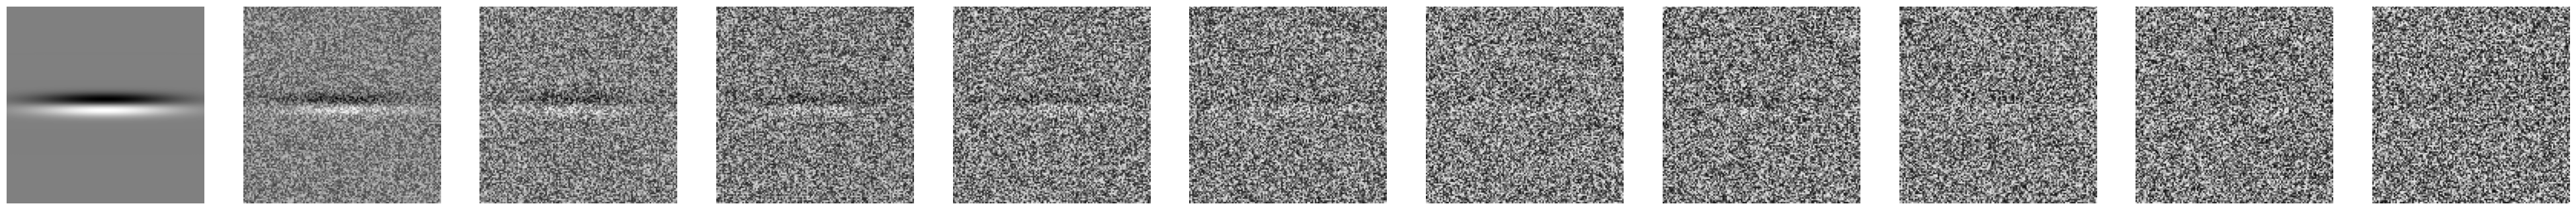

In [3]:
noiseL2show = np.array([0,1,2,3,4,5,6,7,8,9,10])

plt.rcParams['figure.figsize'] = [50,4]  

for ind,noiseL in enumerate(noiseL2show):

    plt.subplot(1,len(noiseL2show),ind+1)
    plt.imshow(w0Dict[noiseL],cmap = 'gray')
    plt.axis("off")
        
plt.subplots_adjust(top=0.9)
#plt.savefig('data/PerturbationsImages.eps', format='eps', dpi=1200)        
plt.show()


### Run the model for Fig 4a

In [4]:
lamda = 10; alpha = 0.2; pa2m = 0.5; sf = sf0; lr = 0.1; minIterations = 20

#different orientations and phases of stimuli tested
step = np.pi/18; 
orientations = np.arange(-np.pi/2,np.pi/2+step,step); phases = np.arange(-np.pi/2,np.pi/2+step,step)
for noiseL in noiseLevels:
    JAll = {}
    print(f'We start processing for noise {noiseL}x')
    for indPhase, ph in enumerate(phases):
        JOri = np.zeros(len(orientations))
        for indOri, ori in enumerate(orientations):
    
            stim = fn.getGabor(cm,sf,ori,N,ph,std)
            JOri[indOri],_,_ = fn.feedforwardModel(stim,w0Dict[noiseL],w1Dict[noiseL],lamda,lr,alpha,pa2m)
            
        JAll[indPhase] = JOri
            
    fileSave = 'data/_2PerturbationsNoiseL'+str(noiseL)+'Pa2m'+str(pa2m)+'Jlamda'+str(int(lamda))+'alpha'+str(alpha)+'.pckl'
    utils.saveVar((orientations,phases,JAll),fileSave)

We start processing for noise 0x
We start processing for noise 1x
We start processing for noise 2x
We start processing for noise 3x
We start processing for noise 4x
We start processing for noise 5x
We start processing for noise 6x
We start processing for noise 7x
We start processing for noise 8x
We start processing for noise 9x
We start processing for noise 10x


### Run the model for Fig 4b

In [5]:
noiseLevels = np.array([1,2,3,4,5,6,7,8,9,10])

lamda = 10; alpha = 0.2; pa2m = 0.5; sf = sf0; lr = 0.1; minIterations = 20
cm = 1.0; N = 129; sf0 = 4/N; theta = 0; phase = 0.0; std = 1/(8*sf0) 
#different orientations and phases of stimuli tested
step = np.pi/18; 
orientations = np.arange(-np.pi/2,np.pi/2+step,step); phases = np.arange(-np.pi/2,np.pi/2+step,step)

stimDict={}
for ori in orientations:
    for ph in phases:
        stimDict[ori,ph] = fn.getGabor(cm,sf,ori,N,ph,std)


#Get w0, w1
w0 = fn.getGabor(cm,sf0,theta,N,phase,std)
A = np.sum(np.absolute(w0));w0 = w0/A

w1 = fn.getGabor(cm,sf0,theta,N,phase+np.pi/2,3*std)
Aw = np.sum(np.absolute(w1));w1 = w1/Aw        
edgeVal = np.max(w0)

reps = 100
J4D = np.zeros((len(noiseLevels),reps,len(orientations),len(phases)))
for indN,noiseL in enumerate(noiseLevels):
    print(f"we are at noise level {noiseL}")
    for rep in range(reps): 

        w0N  = w0 +  noiseL*np.random.uniform(-edgeVal,edgeVal,w0.shape)
        w1N = w1 +  noiseL*np.random.uniform(-edgeVal,edgeVal,w1.shape)
        for indPh,ph in enumerate(phases):
            for indOr,ori in enumerate(orientations):
            
                J4D[indN,rep,indOr,indPh],_,_ = fn.feedforwardModel(stimDict[ori,ph],w0N,w1N,lamda,lr,alpha,pa2m)
     
fileSave = 'data/_2PerturbationsNoiseAllPa2m'+str(pa2m)+'Jlamda'+str(int(lamda))+'alpha'+str(alpha)+'.pckl'
utils.saveVar((w0,w1,noiseLevels,orientations, phases,J4D),fileSave)



we are at noise level 1
we are at noise level 2
we are at noise level 3
we are at noise level 4
we are at noise level 5
we are at noise level 6
we are at noise level 7
we are at noise level 8
we are at noise level 9
we are at noise level 10


### Load the data and do analysis to produce Fig 4a

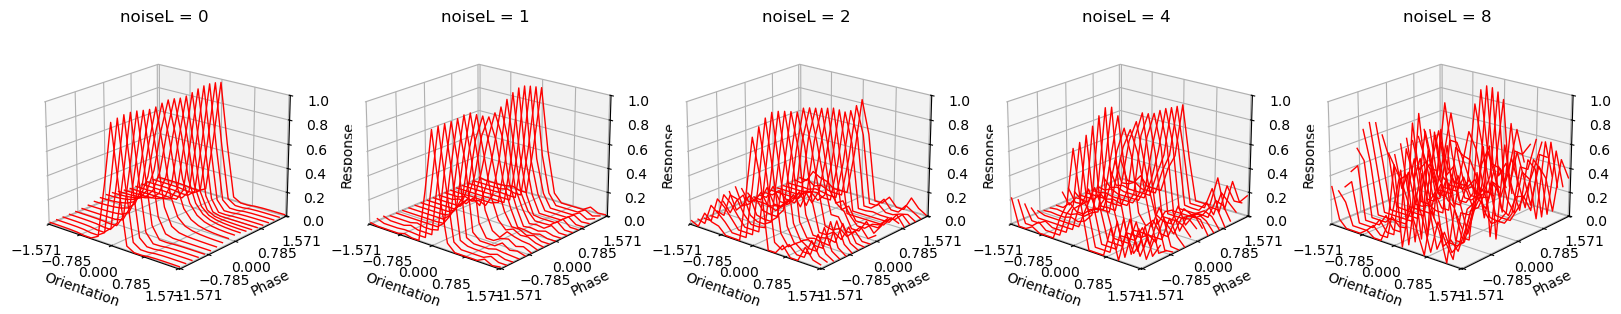

In [6]:
noiseLevels = np.array([0,1,2,4,8])
lamda = 10;alpha = 0.2;pa2m = 0.5

fig = plt.figure(figsize=(20,12))
 # syntax for 3-D projection

for indNoise,noiseL in enumerate(noiseLevels):
    fileLoad = 'data/_2PerturbationsNoiseL'+str(noiseL)+'Pa2m'+str(pa2m)+'Jlamda'+str(int(lamda))+'alpha'+str(alpha)+'.pckl'
    (orientations,phases,JAll) = utils.loadVar(fileLoad)
    ones = np.ones(len(orientations))


    phaseValues = np.zeros(len(phases))
    for indPhase,phase in enumerate(phases):
        JAll[indPhase] = fn.ReLU(JAll[indPhase])
        phaseValues[indPhase] = np.max((JAll[indPhase]))
        
    
    normValue = np.max(phaseValues)    
    x = orientations
    indZero = np.argmin(np.abs(orientations)) #find orientation closest to zero
    ax = fig.add_subplot(1, len(noiseLevels), indNoise+1, projection='3d')

    ttl = 'noiseL = '+str(noiseL);plt.title(ttl)
    for indPhase,phase in enumerate(phases):
    
        z = JAll[indPhase]/normValue
        phaseValues[indPhase] = JAll[indPhase][indZero]/normValue
        y = ones*phase
        ax.plot3D(x, y, z, 'red',linewidth = 1)
        plt.xticks(np.array([-np.pi/2,-np.pi/4, 0, np.pi/4, np.pi/2]))
        plt.yticks(np.array([-np.pi/2,-np.pi/4, 0, np.pi/4, np.pi/2]))    
    
    # Customize the view angle so it's easier to see that the scatter points lie on the plane y=0
    ax.view_init(elev=20., azim=-50)


    # Make legend, set axes limits and labels
    ax.set_xlim(-1.6, 1.6)
    ax.set_ylim(-1.6, 1.6)
    ax.set_zlim(0, 1)
    ax.set_zticks(np.array([0, 0.2,0.4,0.6,0.8,1.0]))
    ax.set_xlabel('Orientation')
    ax.set_ylabel('Phase')
    ax.set_zlabel('Response')
    #ax.grid(False)
    
#plt.savefig('data/Perturbations3D.eps', format='eps', dpi=1200)        
plt.show()

### Load the data and do analysis to produce Fig 4b

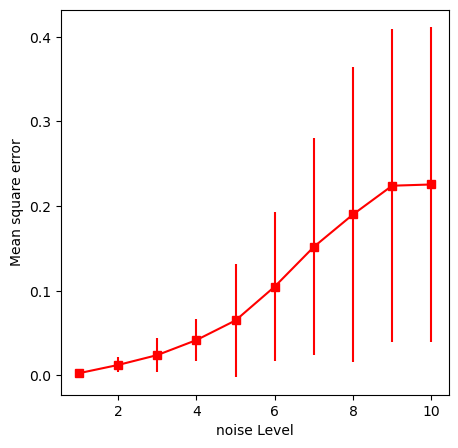

In [7]:
lamda = 10;alpha = 0.2;pa2m = 0.5;reps = 100
noiseLevels = np.array([1,2,3,4,5,6,7,8,9,10])

#############Load and organize the data
fileLoad = 'data/_2PerturbationsNoiseAllPa2m'+str(pa2m)+'Jlamda'+str(int(lamda))+'alpha'+str(alpha)+'.pckl'
(w0,w1,noiseLevels,orientations, phases,J4D) = utils.loadVar(fileLoad)

J4D = fn.ReLU(J4D) 
                
indZeroOri = np.argmin(np.absolute(orientations))
#phase profiles just for the zero orientation
J3D = np.zeros((len(noiseLevels),reps,len(phases)))
J3D = J4D[:,:,indZeroOri,:]


####### Create the control 3d from which we compare (take mean square error) all the other noisy ones
cm = 1.0; N = 129; sf = 4/N; std = 1/(8*sf0)

JZeroNoise = np.zeros((len(orientations),len(phases)))
for indph, ph in enumerate(phases):
    for indori,ori in enumerate(orientations):
        stim = fn.getGabor(cm,sf,ori,N,ph,std)   
        J,_,_ = fn.feedforwardModel(stim,w0,w1,lamda,lr,alpha,pa2m)
        JZeroNoise[indori,indph] = fn.ReLU(J)

JZeroNoise = JZeroNoise/np.max(JZeroNoise)
JZeroNoisePhase = np.zeros(len(phases))
JZeroNoisePhase = JZeroNoise[indZeroOri,:]

#######Get the mean square errors
MSE = np.zeros((len(noiseLevels),reps))
MSEPhase = np.zeros((len(noiseLevels),reps))

for rep in range(reps):
    for indN,noiseL in enumerate(noiseLevels):
        JNoise = J4D[indN,rep,:,:]/np.max(J4D[indN,rep,:,:])
        
        JNoisePhase = J3D[indN,rep,:]/np.max(J4D[indN,rep,:,:])
        
        MSE[indN,rep] = ((JZeroNoise - JNoise)**2).mean()
        
        MSEPhase[indN,rep] = ((JZeroNoisePhase - JNoisePhase)**2).mean()
        
        
##########Plot
####################################################

#MSE OF THE PHASE RESPONSE 

####################################################

MSEstd = np.std(MSEPhase,axis=1)
MSEmean = np.mean(MSEPhase,axis=1)
  
fig = plt.figure(figsize=(5,5))                            
plt.errorbar(noiseLevels, MSEmean, MSEstd, color = 'r', marker='s')
plt.xlabel('noise Level')
plt.ylabel('Mean square error')

#plt.savefig('data/PerturbationsPhaseResponseMSE.eps', format='eps', dpi=1200)     
plt.show()